# Wraggling, Summarizing, and Plotting 

## Preliminaries

You don't need to import numpy to run pandas, but numpy comes in handy so often, we generally import it as well.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

Let's reuse our function from last time (but with a new name).

In [6]:
def bcd_load_clean():
    bcd = pd.read_csv('./data/breast_cancer_data.csv')
    bcd['patient_id'] = bcd['patient_id'].astype('string')
    bcd['doctor_name'] = bcd['doctor_name'].str.split().str[1]
    bcd['bare_nuclei'] = bcd['bare_nuclei'].replace('?', '')
    bcd['bare_nuclei'] = pd.to_numeric(bcd['bare_nuclei'])
    
    return bcd

Load our data:

In [65]:
bcd = bcd_load_clean()

Now, for convenience, let's make a smaller data set to play with. We'll do this by dropping some of the columns.

We can do this in one of two ways. We can either `.drop` the columns we don't want, or `.copy` the columns we do. Here's the first method:

In [91]:
bcd.columns # so we can copy and paste rather than type.

Index(['patient_id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'doctor_name'],
      dtype='object')

In [74]:
bcd2 = bcd.drop(labels = ['patient_id', 'cell_size_uniformity', 'cell_shape_uniformity', 
                          'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
                          'bare_nuclei', 'normal_nucleoli', 'mitoses'],
                axis = 1,             # we're selecting column - default is rows
                inplace = False)      # we could modify bcd itself with True

In [73]:
bcd2

,clump_thickness,bland_chromatin,class,doctor_name
0,5.0,3.0,benign,Doe
1,5.0,3.0,benign,Smith
2,3.0,3.0,benign,Lee
3,6.0,3.0,benign,Smith
4,4.0,3.0,benign,Wong
...,...,...,...,...
694,3.0,1.0,benign,Lee
695,2.0,1.0,benign,Smith
696,5.0,8.0,malignant,Lee
697,4.0,10.0,malignant,Lee


---

In the cell below, make the same new data frame using column indexing and the `.copy()` method.

In [78]:
bcd2 = bcd[['clump_thickness', 'bland_chromatin', 'class', 'doctor_name']].copy()

In [79]:
bcd2

,clump_thickness,bland_chromatin,class,doctor_name
0,5.0,3.0,benign,Doe
1,5.0,3.0,benign,Smith
2,3.0,3.0,benign,Lee
3,6.0,3.0,benign,Smith
4,4.0,3.0,benign,Wong
...,...,...,...,...
694,3.0,1.0,benign,Lee
695,2.0,1.0,benign,Smith
696,5.0,8.0,malignant,Lee
697,4.0,10.0,malignant,Lee


---

## What might we want from this data set?

The main thing that comes to mind is whether any of the measures are related to the tumor class. To do this, we can

- group the data by the "class" column
- perform some operation, like computing the mean, separately for the groups.

We might also want to see if the doctors are behaving consistently with respect to one another.

## The split-apply-combine workflow

Much of data wrangling can be thought of "split-apply-combine". This is where we

- split the data into groups
- 
The "combine" stop is generally 

### Splitting - the `groupby()` method

In [80]:
grpd = bcd2.groupby('class')

In [81]:
grpd

So here we see that the output of '.groupby() isn't a regular data frame, but rather a `DataFrameGroupBy` object. 

---

In the cell below, use the \<TAB\> key trick to browse the methods and properties that `grpd` has.

---

One of the early methods on the list is `.boxplot` - see what that does in the cell below!

benign            AxesSubplot(0.1,0.15;0.363636x0.75)
malignant    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

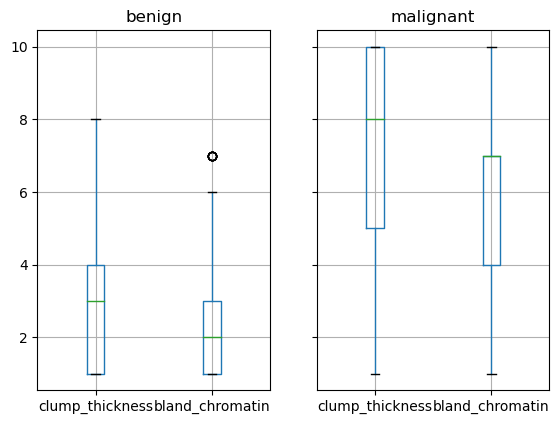

In [85]:
grpd.boxplot()

While not the prettiest plot in the world, it does give us a hint that both of these variables might be related to tumor size.

(Make sure you remember or remind yourself what a box shows you.)

---

Now let's see if we can `.describe` the grouped data.

In [97]:
grpd.describe()  # some useful summary numbers

clump_thickness                                                 \
                    count      mean       std  min  25%  50%   75%   max   
class                                                                      
benign              458.0  2.956332  1.674318  1.0  1.0  3.0   4.0   8.0   
malignant           240.0  7.204167  2.429763  1.0  5.0  8.0  10.0  10.0   

          bland_chromatin                                                
                    count      mean       std  min  25%  50%  75%   max  
class                                                                    
benign              455.0  2.105495  1.081417  1.0  1.0  2.0  3.0   7.0  
malignant           240.0  5.991667  2.270406  1.0  4.0  7.0  7.0  10.0

What is the approximate mean difference between the groups for each measure?

Do a very rough guesstimate of Student's *t* for the clump thickness (e.g., just use the larger sd and smaller n). You can use the cell below as a calculator if you like. 

In [90]:
4/(2.4/np.sqrt(450))

35.35533905932738

What does that tell you?

Now let's make a histogram of grouped data using the appropriate method.

class
benign       [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
malignant    [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
dtype: object

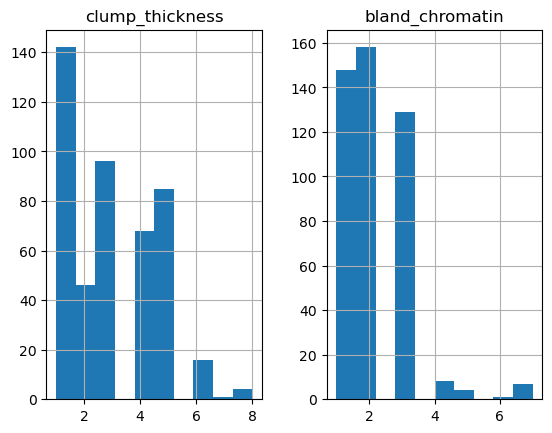

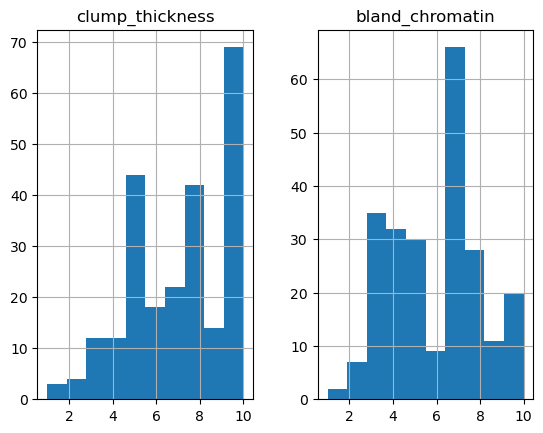

In [98]:
grpd.hist()

Again, not the prettiest plot in the world. By comparison with the boxplot above, we can see that the top row of these histograms correspond to the benign tumors. We can also see that, consistent with the box plots, there is quite a bit overlap in the data values across groups. Is this consistent with your calculation of t?

---

We can also get the data for a group out of the grouped object. This will return a regular data frame the same width as the original, but only containing the requested group's data.

In [100]:
grpd.get_group('benign')

,clump_thickness,bland_chromatin,class,doctor_name
0,5.0,3.0,benign,Doe
1,5.0,3.0,benign,Smith
2,3.0,3.0,benign,Lee
3,6.0,3.0,benign,Smith
4,4.0,3.0,benign,Wong
...,...,...,...,...
690,1.0,1.0,benign,Doe
692,3.0,1.0,benign,Wong
693,3.0,2.0,benign,Lee
694,3.0,1.0,benign,Lee


---

In the cell below, confirm that the returned object is indeed a pandas `DataFrame`.

In [101]:
type(grpd.get_group('benign'))

pandas.core.frame.DataFrame

---

### Applying - doing things to the data within groups

Once we have grouped data, we can easily caluculate things per group. Using the \<TAB\> trick, we can see that these objects produced by `groupby()` have methods for all the common statistical summaries.

#### Simple calculations

We can compute the mean

In [117]:
my_means = grpd.mean(numeric_only = True)
my_means

,clump_thickness,bland_chromatin
class,,
benign,2.956332,2.105495
malignant,7.204167,5.991667


And the standard deviation

In [118]:
my_sds = grpd.std(numeric_only = True)
my_sds

,clump_thickness,bland_chromatin
class,,
benign,1.674318,1.081417
malignant,2.429763,2.270406


Or the counts

In [119]:
my_counts = grpd.count()
my_counts

,clump_thickness,bland_chromatin,doctor_name
class,,,
benign,458,455,458
malignant,240,240,241


We can easily do simple maths on data frames of a compatible size. Here's a comparison of how many z-scores above zero each of the means are:

In [122]:
my_zeds = my_means/my_sds
my_zeds

,clump_thickness,bland_chromatin
class,,
benign,1.765693,1.946977
malignant,2.964967,2.639029


If we look at the difference of z-scores

In [123]:
my_zeds.diff()

,clump_thickness,bland_chromatin
class,,
benign,NaN,NaN
malignant,1.199274,0.692052


This difference in z-scores – how far apart two means are in terms of the standard deviation of the data – is roughly what statisticians call "effect size".

---

In [124]:
Why do the NaNs appear in the first row?

Object `row` not found.


In [ ]:
Why do the NaNs appear in the first row

In the cell below, extract just the numbers from `my_zeds` into a new series or data frame. (hint: using `.loc` is probably easiest)

In [127]:
num_zeds = my_zeds.loc['malignant']
num_zeds

clump_thickness    2.964967
bland_chromatin    2.639029
Name: malignant, dtype: float64

---

#### Mulitiple caclulations with `agg()`

We can do multiple calculation at once by placing function names inside the `agg()` ) or `aggregate()`) method. Here's where importing numpy comes in handy.

In [135]:
grpd.agg([np.mean, np.std])

/var/folders/x5/p_sn_nnx3rx76dlnymqt2r400000gs/T/ipykernel_49386/1757925766.py:1: FutureWarning: ['doctor_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grpd.agg([np.mean, np.std])


clump_thickness           bland_chromatin          
                     mean       std            mean       std
class                                                        
benign           2.956332  1.674318        2.105495  1.081417
malignant        7.204167  2.429763        5.991667  2.270406

---

In the cell below, repeat the above calculation without triggering the warning.

In [141]:
grpd[['clump_thickness', 'bland_chromatin']].agg([np.mean, np.std])

clump_thickness                 bland_chromatin                
                     mean       std count            mean       std count
class                                                                    
benign           2.956332  1.674318   458        2.105495  1.081417   455
malignant        7.204167  2.429763   240        5.991667  2.270406   240

---

We can use the pandas versions of functions by placing them in quotes. This is handy because, for example, pandas has a `count` and numpy doesn't.

In [145]:
grpd[['clump_thickness', 'bland_chromatin']].agg([np.mean, 'std', 'count'])

clump_thickness                 bland_chromatin                
                     mean       std count            mean       std count
class                                                                    
benign           2.956332  1.674318   458        2.105495  1.081417   455
malignant        7.204167  2.429763   240        5.991667  2.270406   240

#### MultiIndexing

Let's store our summary table in its own data frame.

In [182]:
my_summary = grpd[['clump_thickness', 'bland_chromatin']].agg([np.mean, 'std', 'count'])
my_summary

clump_thickness                 bland_chromatin                
                     mean       std count            mean       std count
class                                                                    
benign           2.956332  1.674318   458        2.105495  1.081417   455
malignant        7.204167  2.429763   240        5.991667  2.270406   240

Notice that this data frame has hierachical column labels. In other words, there is a "clump_thickness" meta-column that contains three colums of its own, and that the subcolumns the same names as those in the other meta-column. Thus saying "look at the mean column" would be ambiguous because the meta-column wasn't specified.

In pandas, this is known at "multiIndexing". 

Getting a meta-column is easy. 

In [170]:
my_summary['clump_thickness']

,mean,std,count
class,,,
benign,2.956332,1.674318,458
malignant,7.204167,2.429763,240


In [180]:
my_summary['clump_thickness', 'mean']

class
benign       2.956332
malignant    7.204167
Name: (clump_thickness, mean), dtype: float64

In [185]:
my_summary['clump_thickness'][['mean', 'std']]

,mean,std
class,,
benign,2.956332,1.674318
malignant,7.204167,2.429763


In [174]:
my_summary.loc['benign', ('clump_thickness', 'mean')]

2.9563318777292578

In [181]:
my_summary.loc['benign', ('clump_thickness', 'mean'):('clump_thickness', 'std')]

clump_thickness  mean    2.956332
                 std     1.674318
Name: benign, dtype: float64

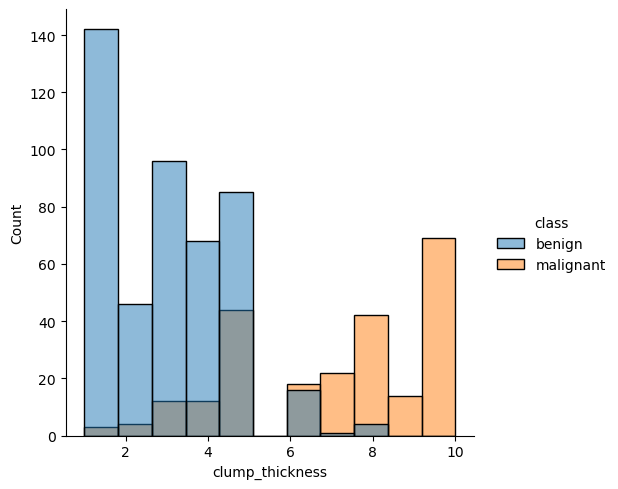

In [12]:
sns.displot(bcd, x = 'clump_thickness', hue = 'class')

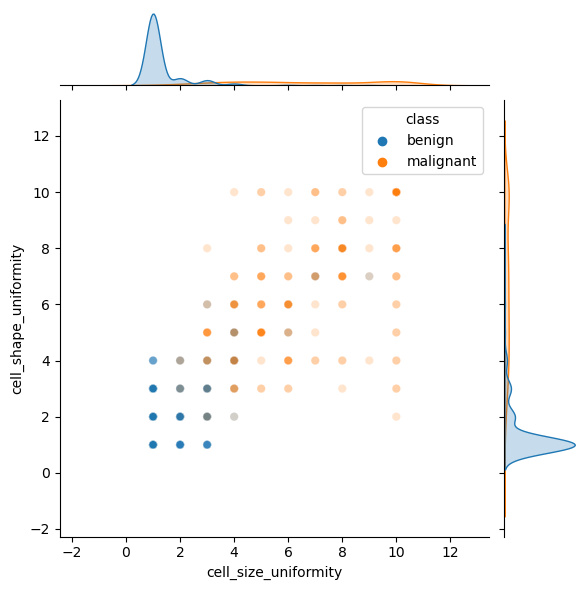

In [15]:
sns.jointplot(data=bcd, 
              x='cell_size_uniformity', 
              y='cell_shape_uniformity', 
              hue = 'class',
              alpha = 0.2)

### Get only numeric columns + 'class'

In [17]:
my_col_names = bcd.columns

In [18]:
my_col_names

Index(['patient_id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'doctor_name'],
      dtype='object')

In [19]:
my_col_names[1:-1]

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'marginal_adhesion', 'single_ep_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

### Make a pairplot

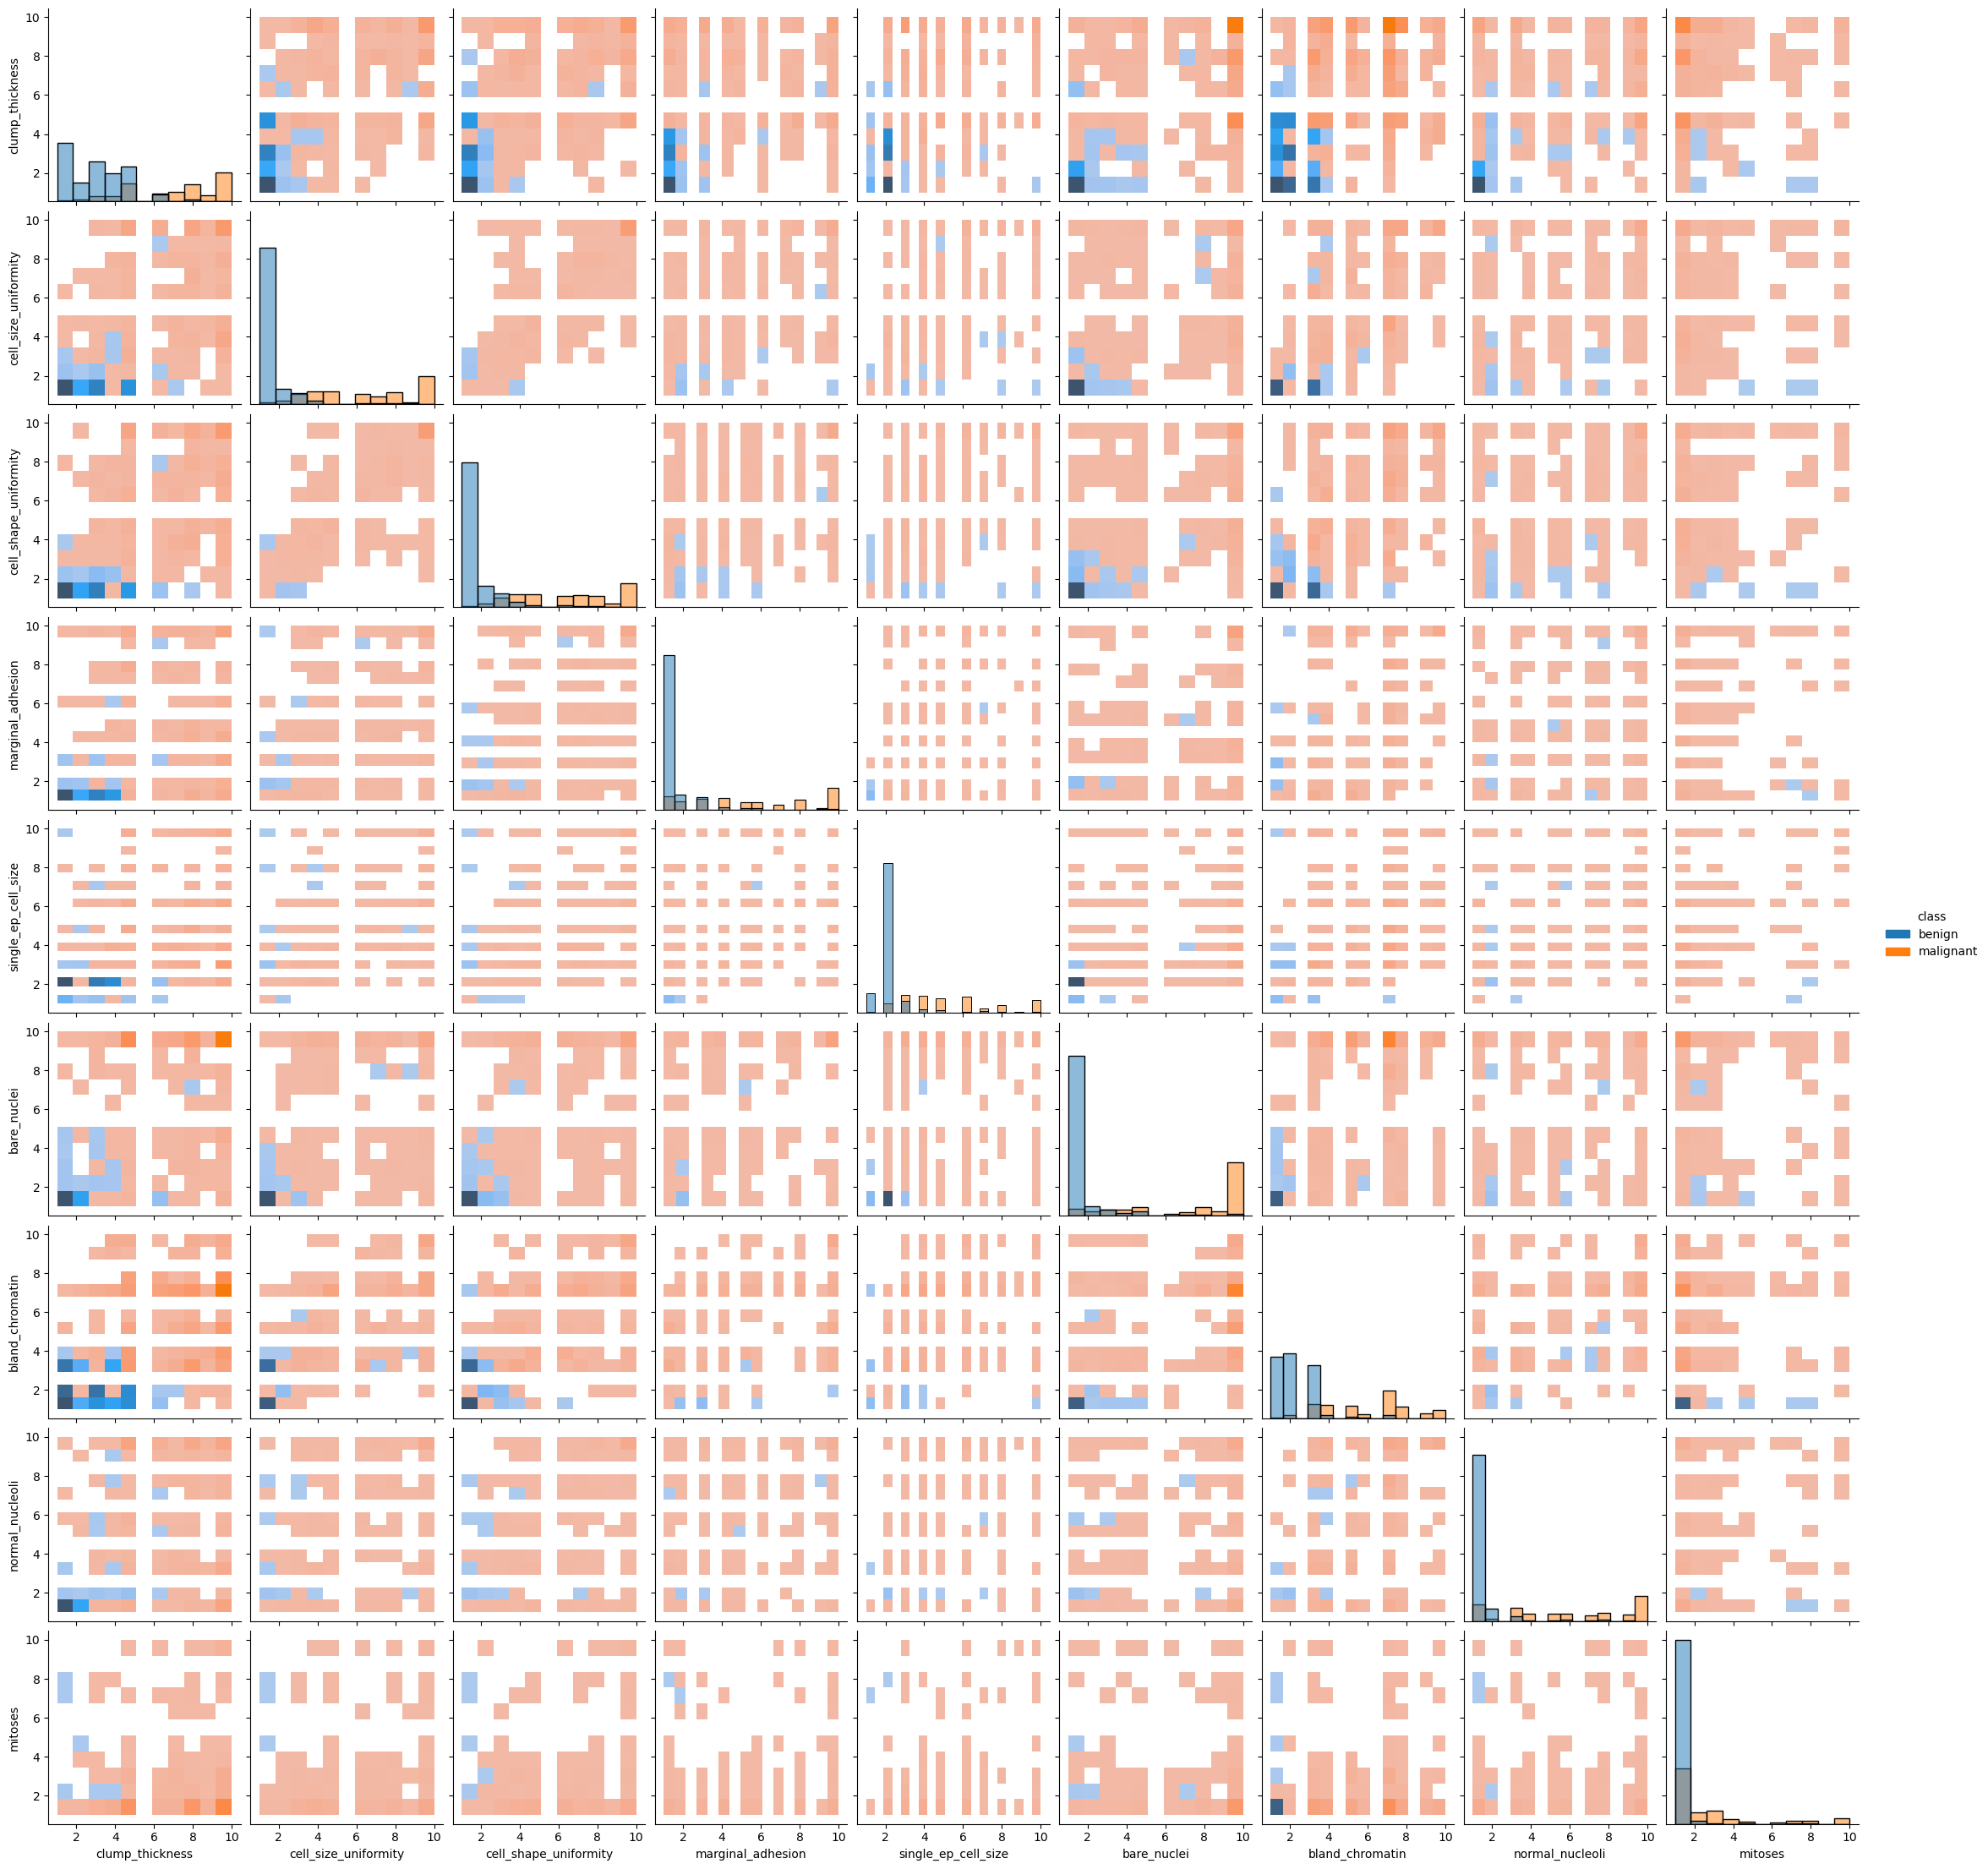

In [23]:
sns.pairplot(bcd[my_col_names], kind = 'hist', hue = 'class')

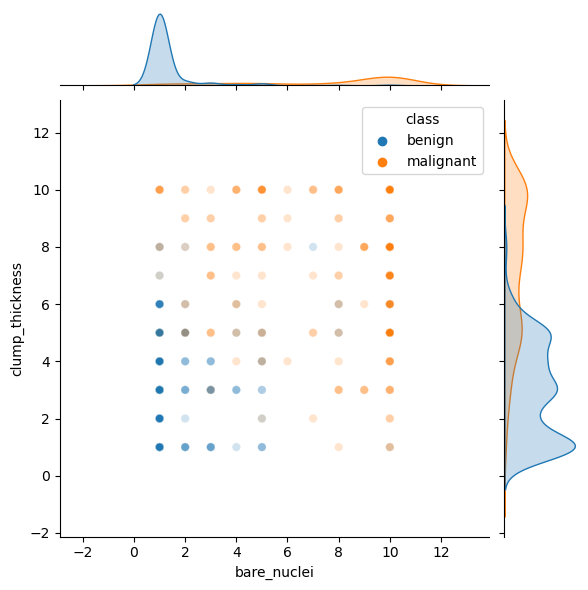

In [24]:
sns.jointplot(data=bcd, 
              x='bare_nuclei', 
              y='clump_thickness', 
              hue = 'class',
              alpha = 0.2)

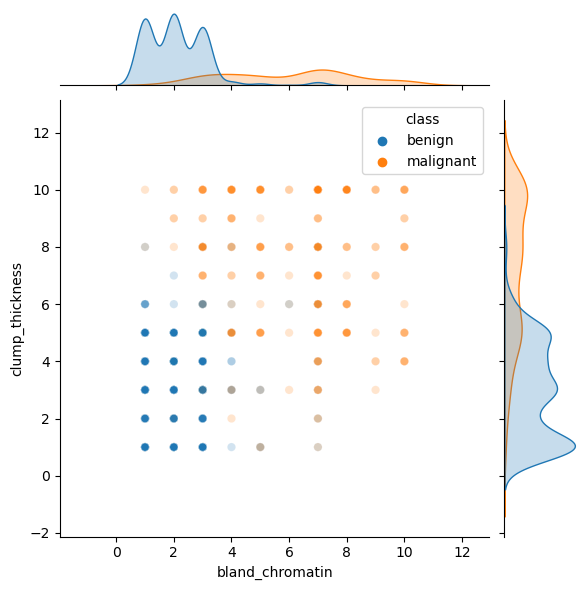

In [26]:
sns.jointplot(data=bcd, 
              x='bland_chromatin', 
              y='clump_thickness', 
              hue = 'class',
              alpha = 0.2)

### Duplicate entries

In [16]:
bcd.nunique()

patient_id               645
clump_thickness           10
cell_size_uniformity      10
cell_shape_uniformity     10
marginal_adhesion         10
single_ep_cell_size       10
bare_nuclei               10
bland_chromatin           10
normal_nucleoli           10
mitoses                    9
class                      2
doctor_name                4
dtype: int64

In [ ]:
df[df.duplicated(subset = 'patient_id', keep =False)].sort_values('patient_id')


In [ ]:
repeat_patients = df.groupby(by = 'patient_id').size().sort_values(ascending =False)

### Summaries

### Combining multiple files

In [ ]:
ls